    Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысл).

    Можно взять не очень актуальные, но готовые данные отсюда.

    Построить модель парной линейной регрессии с использованием метода градиентного спуска.
    Оценить на графике качество построенной модели.
    Построить кривые обучения.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://docs.google.com/document/u/0/d/1qaXgiv23dXfOFehqAvmnZQRa4DhyZbZKL-_Lhdm_UrM/mobilebasic

In [ ]:
#For google drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d_hnd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/D_J-IND_101001_171001.txt')
gazp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/GAZP_101001_171001.txt')
mgnt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/MGNT_101001_171001.txt')
mvid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/MVID_101001_171001.txt')
sber = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/SBER_101001_171001.txt')
usdrub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/USDRUB_101001_171001.txt')
yndx = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/drive-download-20220315T124812Z-001/YNDX_101001_171001.txt')
names = [d_hnd, gazp, mgnt, mvid,sber,usdrub, yndx]

In [ ]:
res = pd.merge(sber, mvid, on='<DATE>')
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

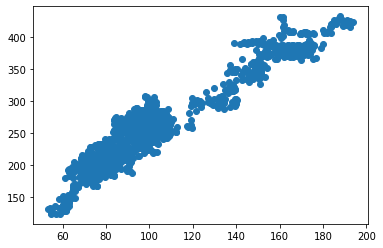

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Regress:
  """Model of pair regression"""

  def __init__(self):
    self.b0 = 0
    self.b1 = 0

  
  def error_of_mistake(self, steps, error):
    plt.figure()
    plt.plot(steps, error, 'g')
    plt.show()


  def printout(self,x,y):
    X0 = np.linspace(60, 180, 100)
    Y0 = self.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()


  def predict(self,x):
    #Make a prediction
    #print("Prediction: ", self.b0 + self.b1 * x )
    return(self.b0 + self.b1 * x)
  

  def error(self, x, y):
    #Fucntion on the error
    #print("Error/MSE: ", sum((self.predict(x)-y)**2) / (2* len(x)))
    return(sum((self.predict(x) - y)**2) / (2 * len(x)))
  

  def BDG_ver1(self,X,Y):
    alpha = 0.00005
    dJ0 = sum(self.predict(X) - Y) /len(X)
    dJ1 = sum((self.predict(X) - Y) * X) /len(X)
    self.b0 -= alpha * dJ0
    self.b1 -= alpha * dJ1

    self.printout(x,y)



  def BDG_ver2(self, x, y, alpha=0.000005, accuracy=0.01, max_steps=5000):
    #Gradient decreasing
    steps,error = [],[]
    step=0
    old_error = hyp.error(x,y)
    new_error = hyp.error(x,y) - 1
    dj = 1
    while (dj > accuracy) and (step<max_steps):
      dj0 = sum(self.predict(x) - y)/len(x)
      dj1 = sum((self.predict(x)-y) * x)/len(x)
      self.b0 -= alpha * dj0
      self.b1 -= alpha * dj1
      old_error = new_error
      new_error = hyp.error(x,y)
      dj = abs(old_error - new_error)
      step += 1
      steps.append(step)
      error.append(new_error)
    #print("Steps: ",steps,"\nErrors: ", error)
    self.printout(x,y)
    return (steps,error)


hyp = Regress()

####
# print(hyp.predict(0))
# print(hyp.predict(100))
# J = hyp.error(x, y)
# print("initial error:", J)
####
# steps,error = hyp.BDG_ver1(x,y)
# j = hyp.error(x,y)
# print("Error after gradient descent: ", j)
####


In [ ]:
#First check
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

In [ ]:
#First version of gradient downing
hyp.BDG_ver1(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

In [ ]:
steps, errors = hyp.BDG_ver2(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

In [ ]:
for i in range(len([1,2,3,4])):
  for j in range(1,len([1,2,3,4])):
    print(i,j)

0 1
0 2
0 3
1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


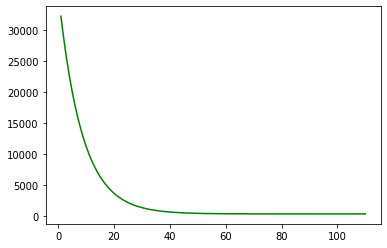

In [ ]:
hyp.error_of_mistake(steps, errors)




Beginning operation with d_hnd and gazp


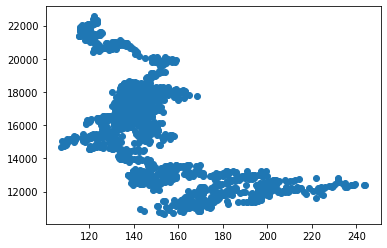


Obtained first result

 First version of gradient downing


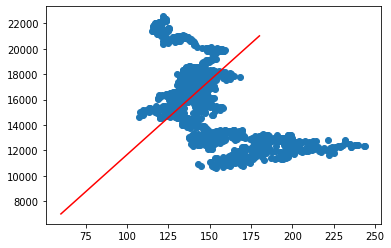

error after gradient descent: 15360518.514526434


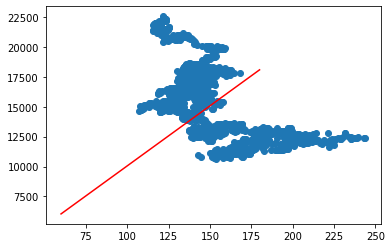

error after gradient descent: 12267360.082363483


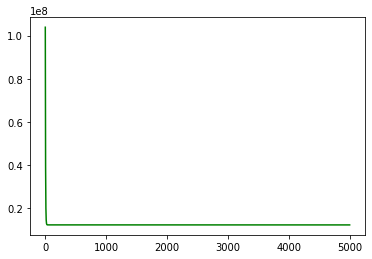




Beginning operation with d_hnd and mgnt


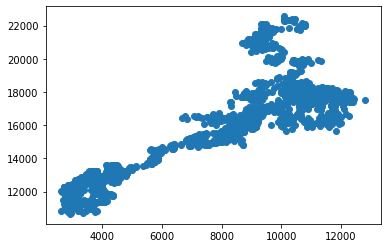


Obtained first result

 First version of gradient downing


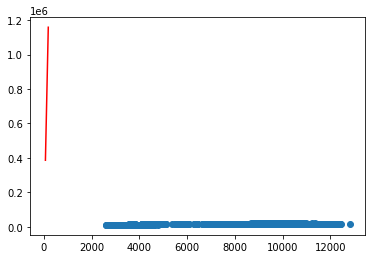

error after gradient descent: 1406001648309137.0


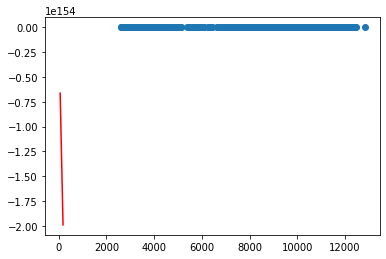

error after gradient descent: inf


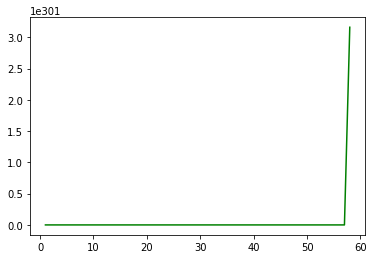




Beginning operation with d_hnd and mvid


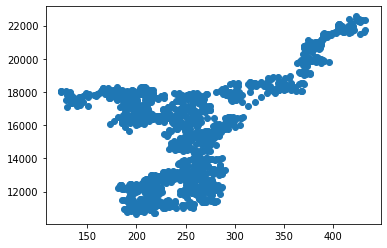


Obtained first result

 First version of gradient downing


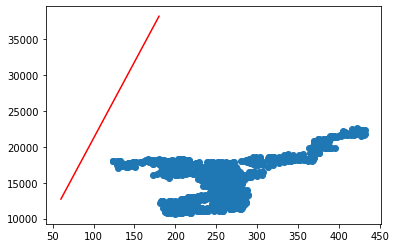

error after gradient descent: 856334107.5870578


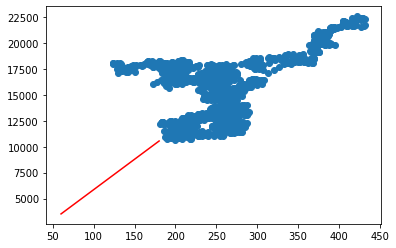

error after gradient descent: 5455371.868317771


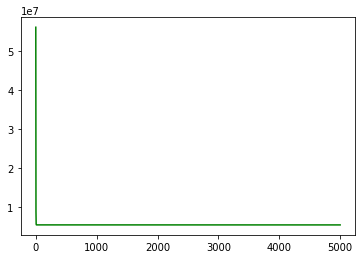




Beginning operation with d_hnd and sber


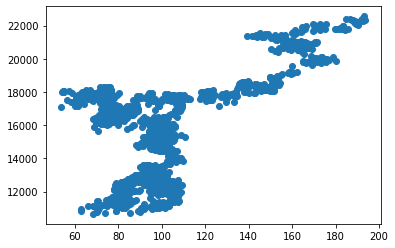


Obtained first result

 First version of gradient downing


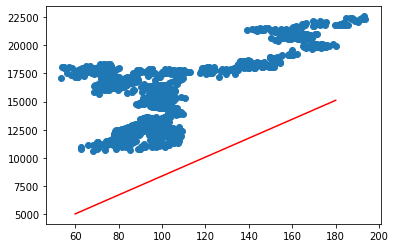

error after gradient descent: 29173677.758142073


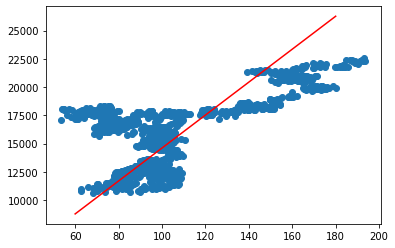

error after gradient descent: 6989852.626546622


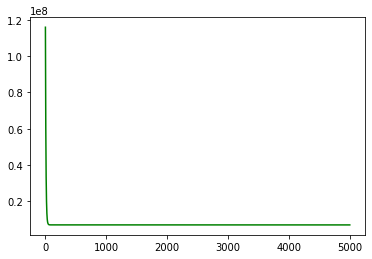




Beginning operation with d_hnd and usdrub


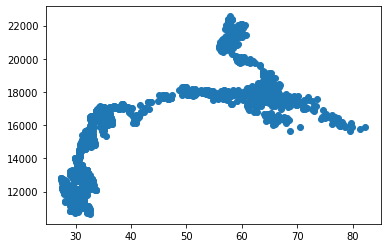


Obtained first result

 First version of gradient downing


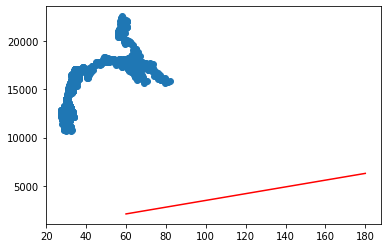

error after gradient descent: 103167779.58985068


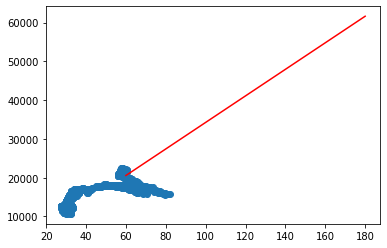

error after gradient descent: 6483409.768661138


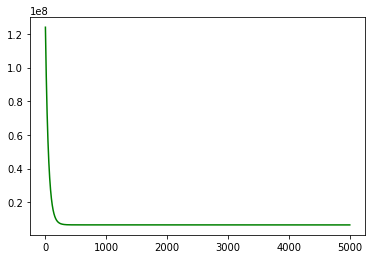




Beginning operation with d_hnd and yndx


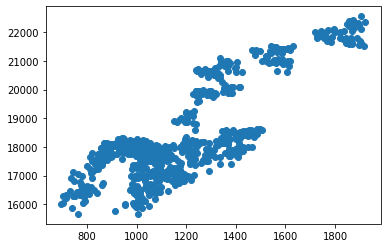


Obtained first result

 First version of gradient downing


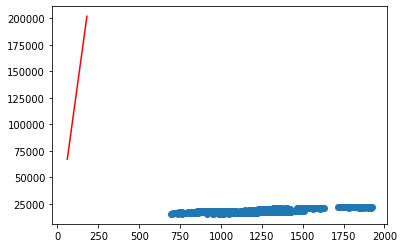

error after gradient descent: 924034596167.9911


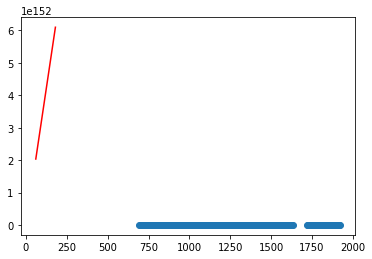

error after gradient descent: inf


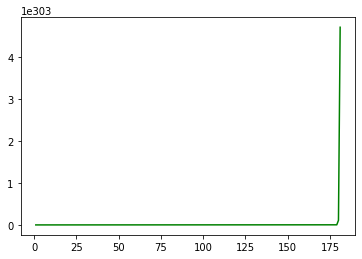




Beginning operation with gazp and mgnt


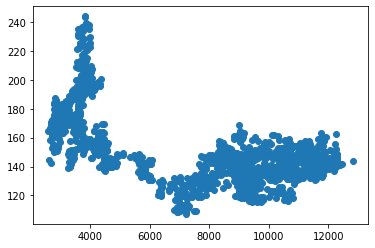


Obtained first result

 First version of gradient downing


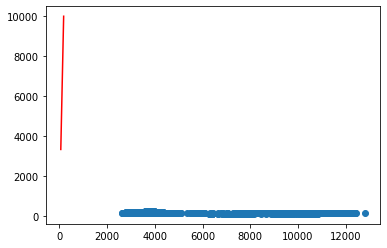

error after gradient descent: 104564645582.20485


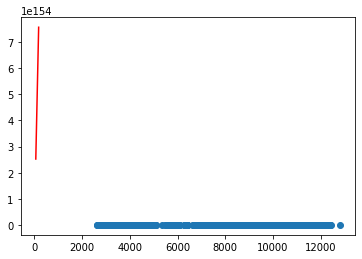

error after gradient descent: inf


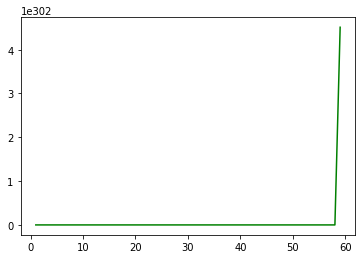




Beginning operation with gazp and mvid


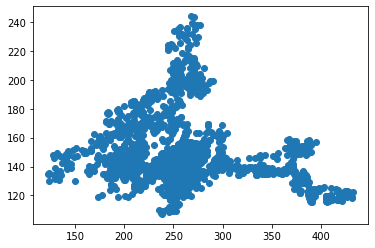


Obtained first result

 First version of gradient downing


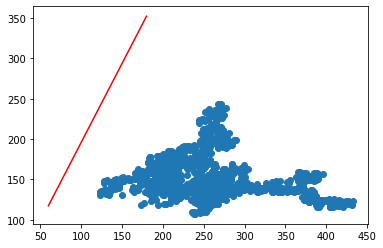

error after gradient descent: 73935.20414434427


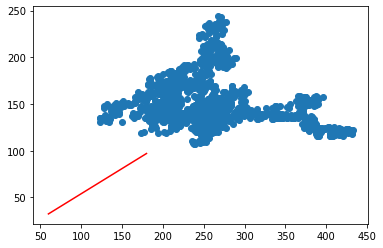

error after gradient descent: 1083.8165033469675


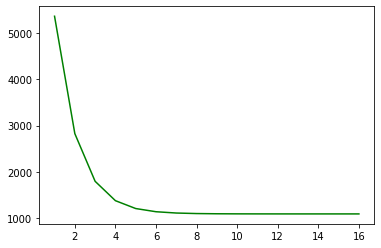




Beginning operation with gazp and sber


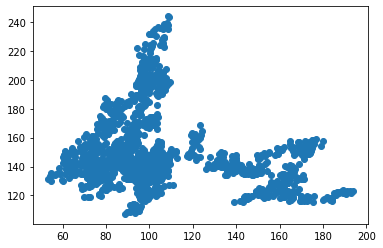


Obtained first result

 First version of gradient downing


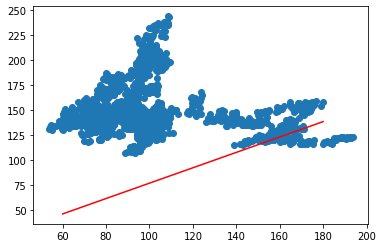

error after gradient descent: 3206.688732845396


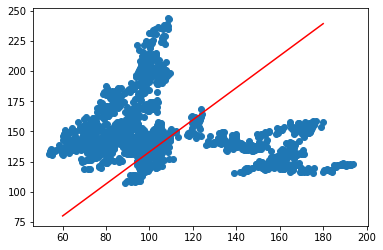

error after gradient descent: 1369.5910762185074


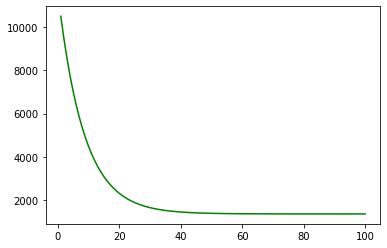




Beginning operation with gazp and usdrub


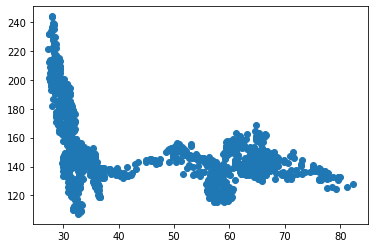


Obtained first result

 First version of gradient downing


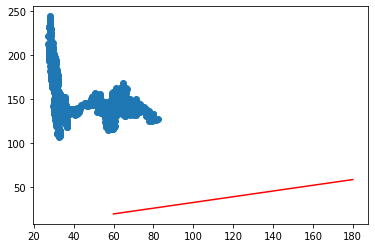

error after gradient descent: 9635.235490436224


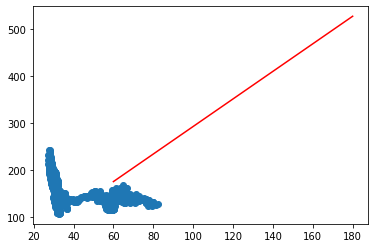

error after gradient descent: 2036.079569330821


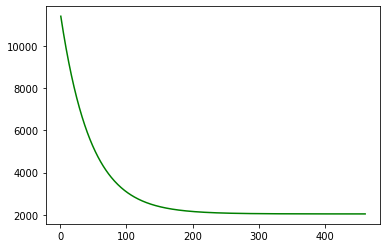




Beginning operation with gazp and yndx


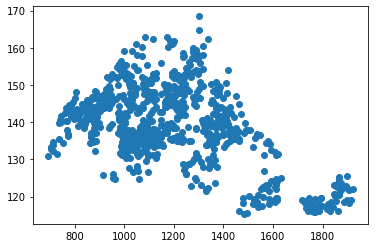


Obtained first result

 First version of gradient downing


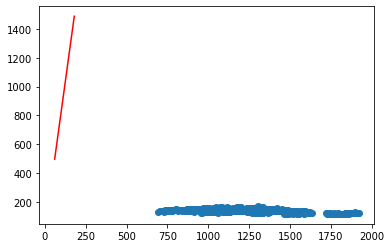

error after gradient descent: 50276533.12193434


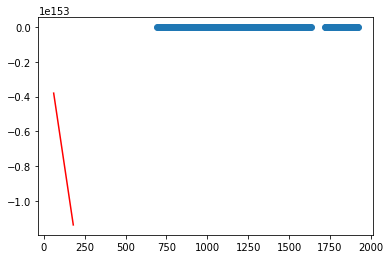

error after gradient descent: inf


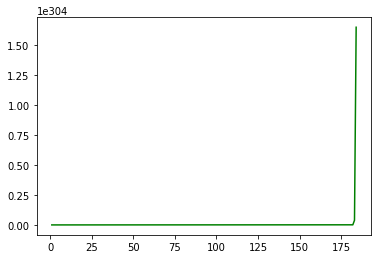




Beginning operation with mgnt and mvid


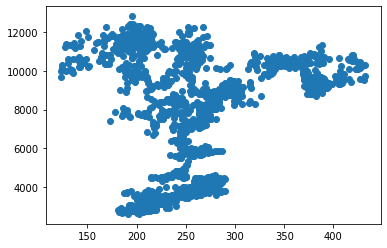


Obtained first result

 First version of gradient downing


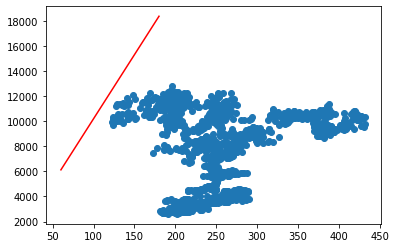

error after gradient descent: 203231510.70046896


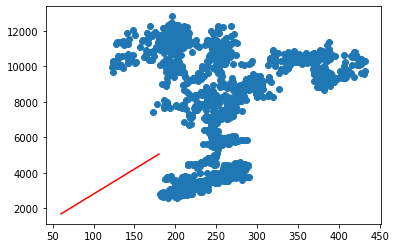

error after gradient descent: 5430810.517631452


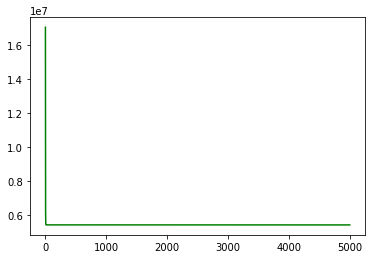




Beginning operation with mgnt and sber


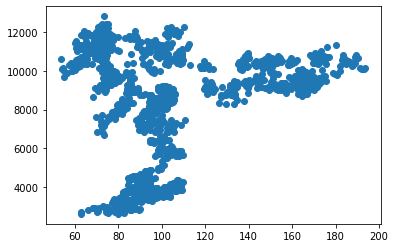


Obtained first result

 First version of gradient downing


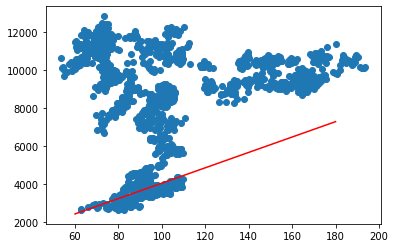

error after gradient descent: 10838749.914061094


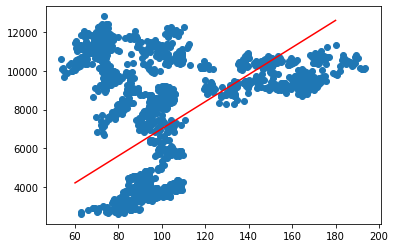

error after gradient descent: 5767954.478231867


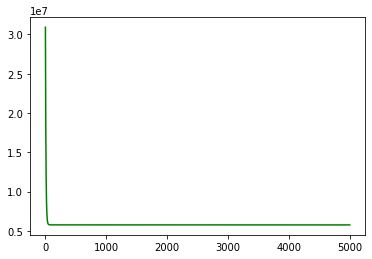




Beginning operation with mgnt and usdrub


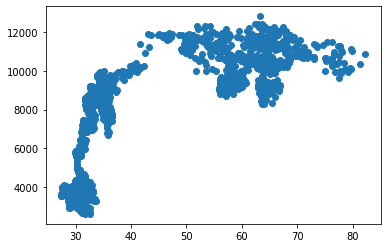


Obtained first result

 First version of gradient downing


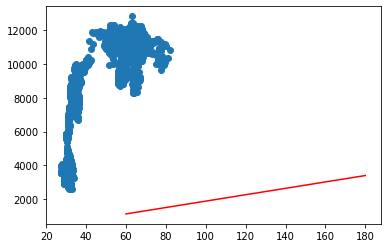

error after gradient descent: 27347963.994798556


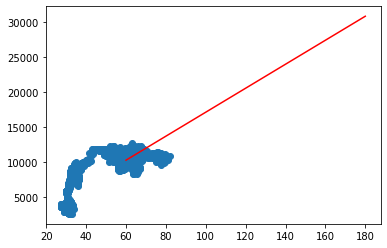

error after gradient descent: 1657533.0207060294


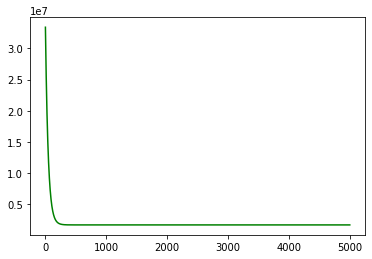




Beginning operation with mgnt and yndx


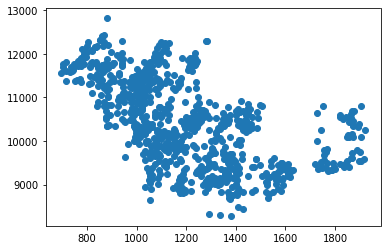


Obtained first result

 First version of gradient downing


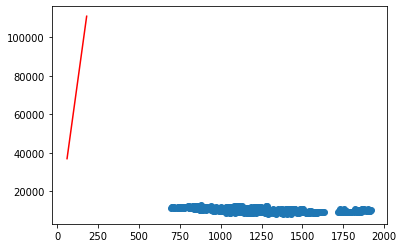

error after gradient descent: 278651554606.7873


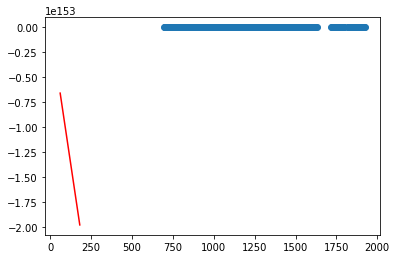

error after gradient descent: inf


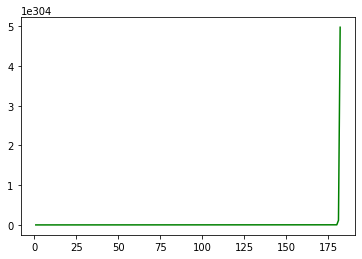




Beginning operation with mvid and sber


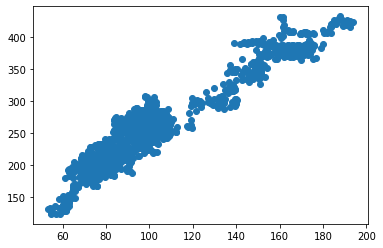


Obtained first result

 First version of gradient downing


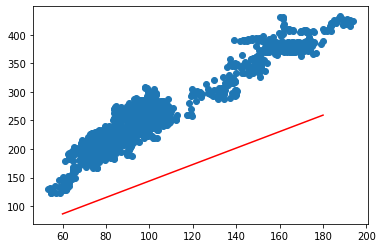

error after gradient descent: 6734.135540194945


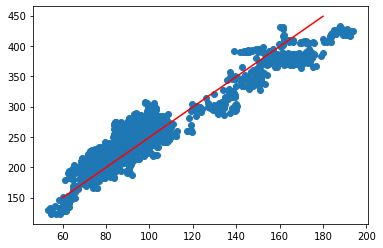

error after gradient descent: 298.76881676471504


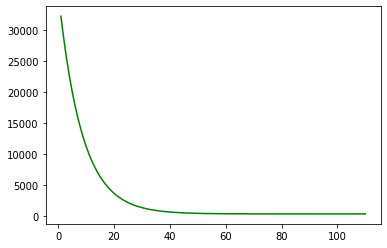




Beginning operation with mvid and usdrub


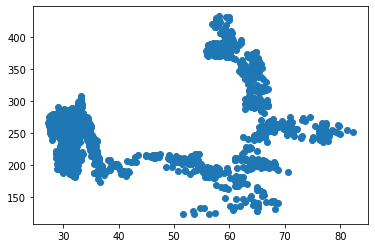


Obtained first result

 First version of gradient downing


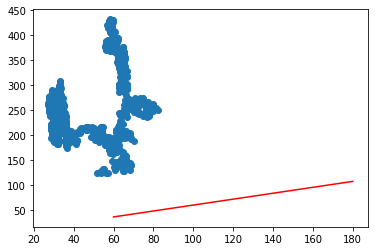

error after gradient descent: 29596.77324746718


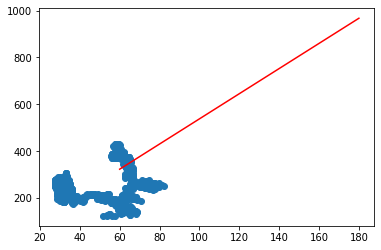

error after gradient descent: 4208.870748272799


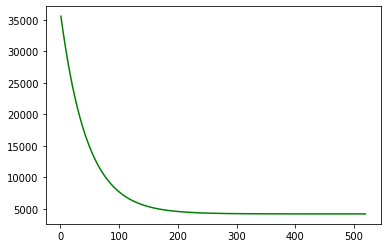




Beginning operation with mvid and yndx


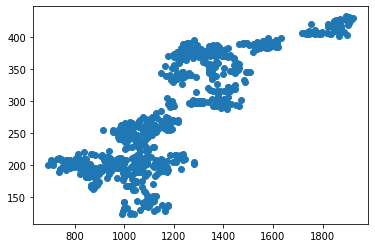


Obtained first result

 First version of gradient downing


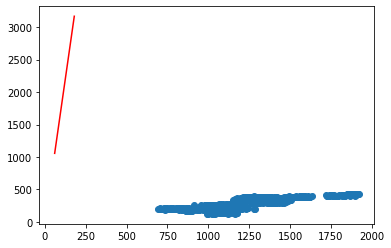

error after gradient descent: 227556011.5506219


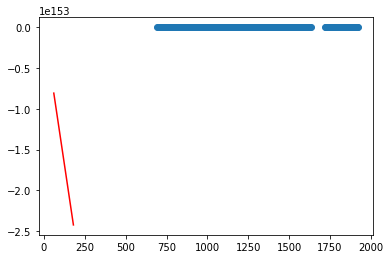

error after gradient descent: inf


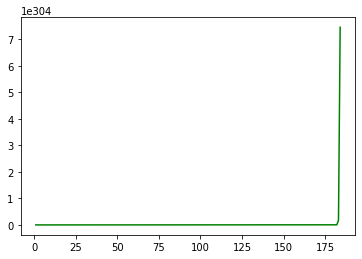




Beginning operation with sber and usdrub


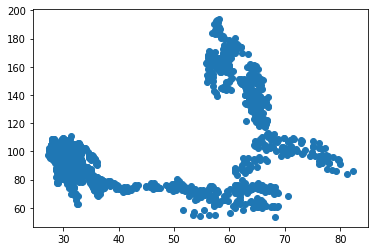


Obtained first result

 First version of gradient downing


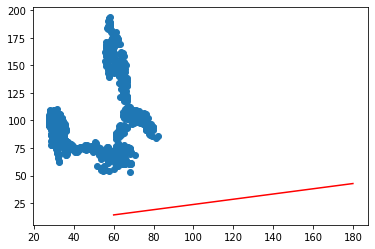

error after gradient descent: 4705.359032480687


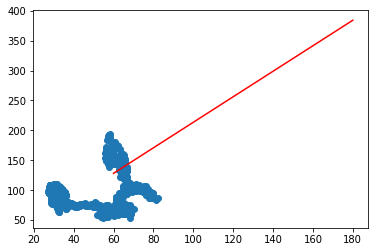

error after gradient descent: 657.0345081431715


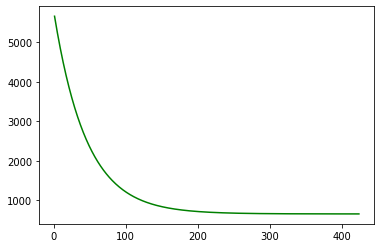




Beginning operation with sber and yndx


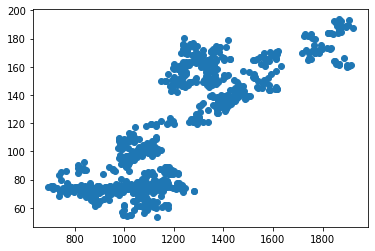


Obtained first result

 First version of gradient downing


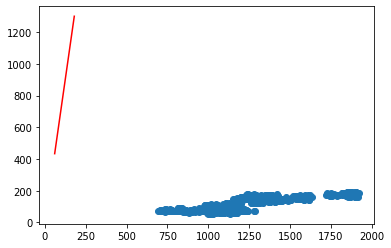

error after gradient descent: 38316819.34799366


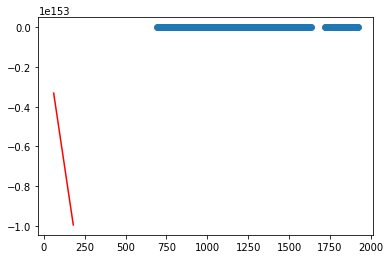

error after gradient descent: inf


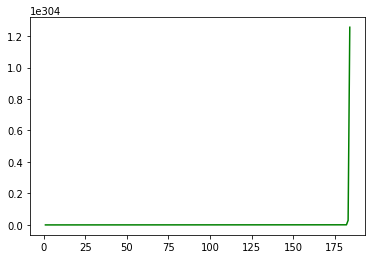




Beginning operation with usdrub and yndx


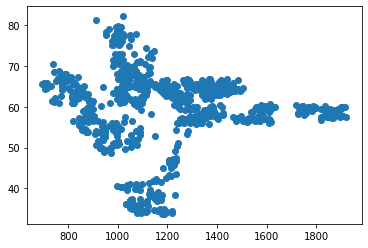


Obtained first result

 First version of gradient downing


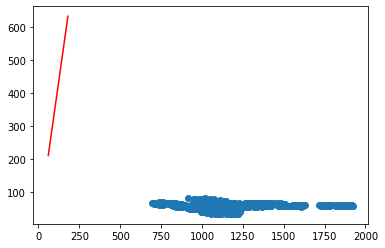

error after gradient descent: 9071499.327757496


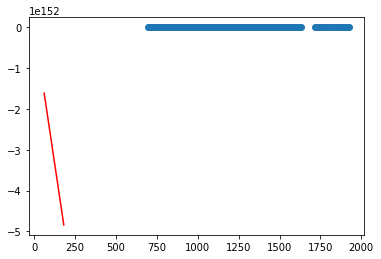

error after gradient descent: inf


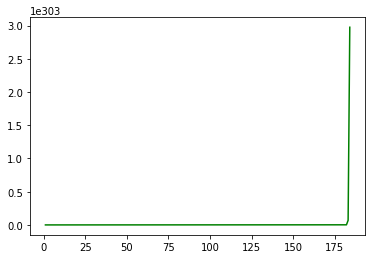

In [ ]:
instruments = ["d_hnd", "gazp", "mgnt", "mvid","sber","usdrub", "yndx"]

for i in range(len(names)):
  for j in range(i,len(names)):
    if(i!=j):
      print(f"\n\n\nBeginning operation with {instruments[i]} and {instruments[j]}")
      res = pd.merge(names[j], names[i], on='<DATE>')
      x = res['<CLOSE>_x']
      y = res['<CLOSE>_y']
      plt.figure()
      plt.scatter(x, y)
      plt.show()
      print("\nObtained first result")

      hyp = Regress()
      print("\n First version of gradient downing")
      hyp.BDG_ver1(x, y)
      J = hyp.error(x, y)
      print("error after gradient descent:", J)

      hyp = Regress()
      steps, errors = hyp.BDG_ver2(x, y)
      J = hyp.error(x, y)
      print("error after gradient descent:", J)
      hyp.error_of_mistake(steps, errors)





Beginning operation with d_hnd and gazp


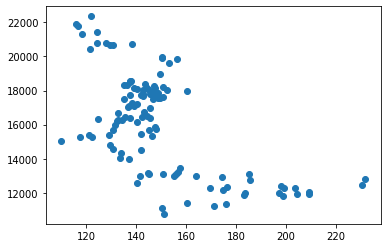


Obtained first result

 First version of gradient downing


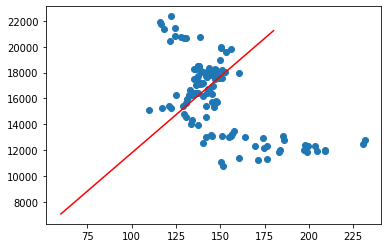

error after gradient descent: 14314785.011946838


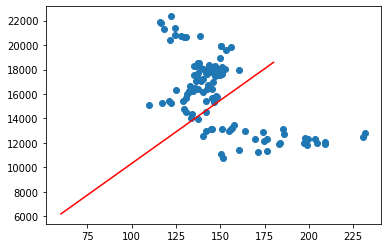

error after gradient descent: 11836485.68100301


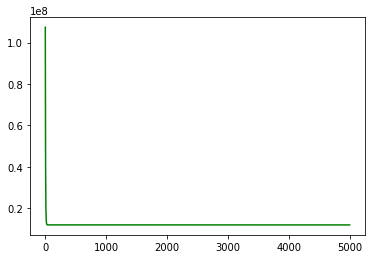




Beginning operation with d_hnd and mgnt


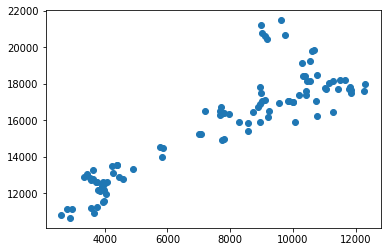


Obtained first result

 First version of gradient downing


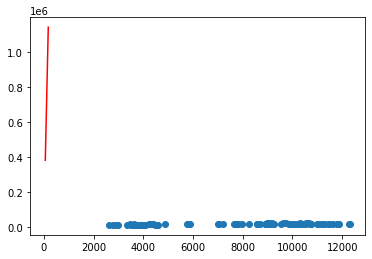

error after gradient descent: 1351256961409364.2


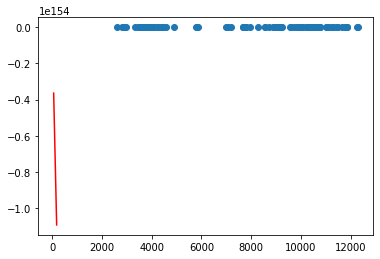

error after gradient descent: inf


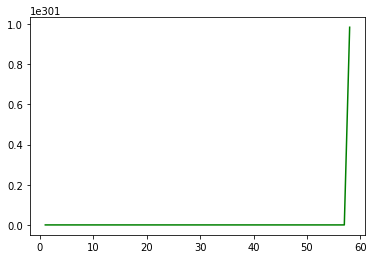




Beginning operation with d_hnd and mvid


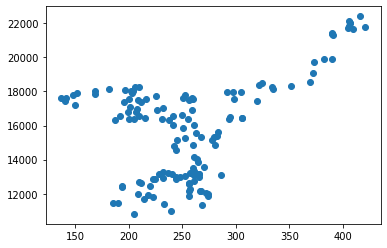


Obtained first result

 First version of gradient downing


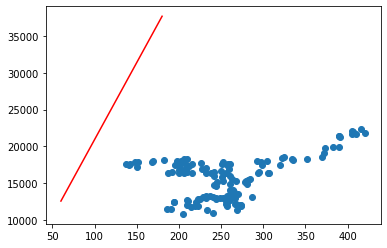

error after gradient descent: 806607343.1672252


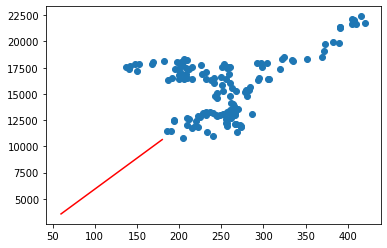

error after gradient descent: 6206911.860167621


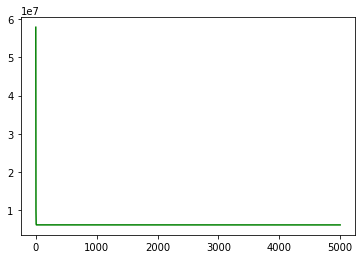




Beginning operation with d_hnd and sber


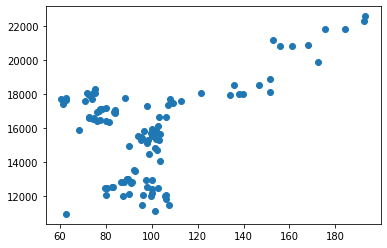


Obtained first result

 First version of gradient downing


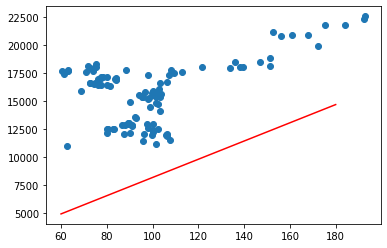

error after gradient descent: 32616722.70699202


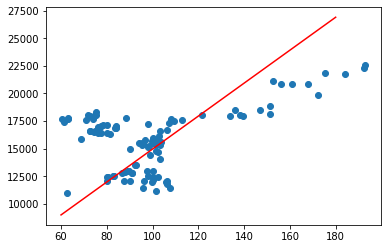

error after gradient descent: 7344608.5587347755


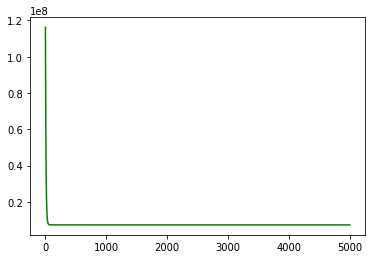




Beginning operation with d_hnd and usdrub


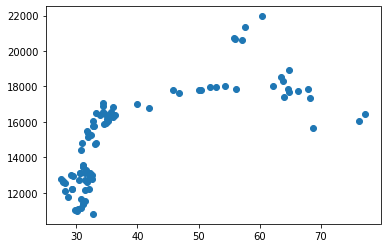


Obtained first result

 First version of gradient downing


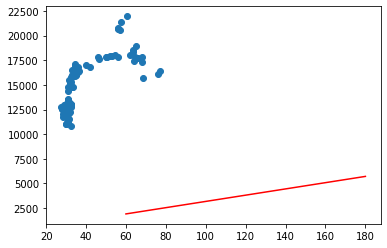

error after gradient descent: 99624233.21252306


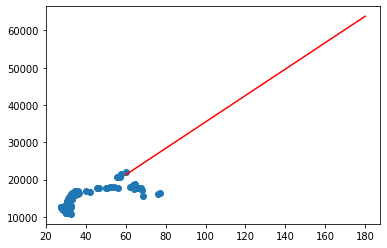

error after gradient descent: 6184905.138766027


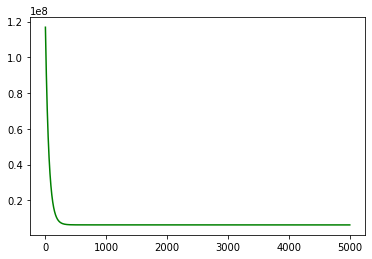




Beginning operation with d_hnd and yndx


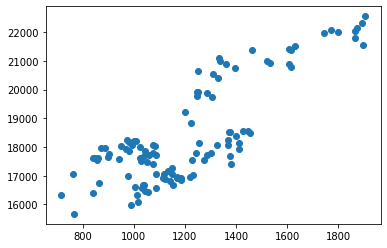


Obtained first result

 First version of gradient downing


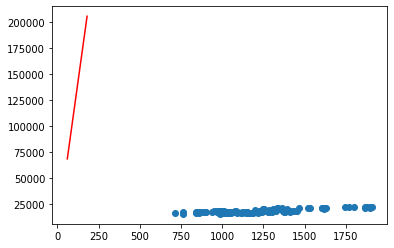

error after gradient descent: 993676873049.853


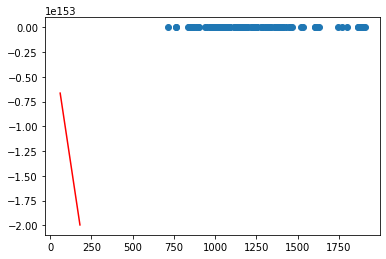

error after gradient descent: inf


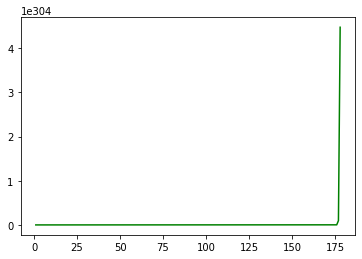




Beginning operation with gazp and mgnt


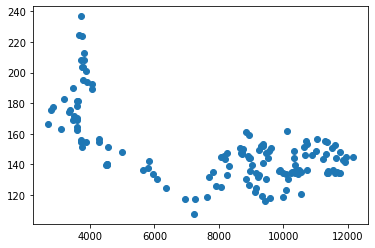


Obtained first result

 First version of gradient downing


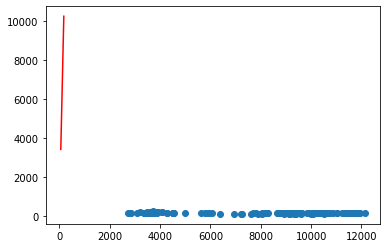

error after gradient descent: 114351295594.48177


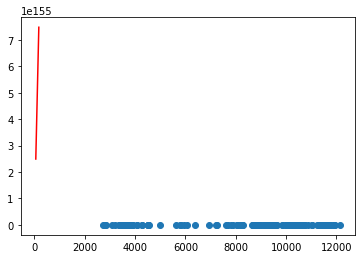

error after gradient descent: inf


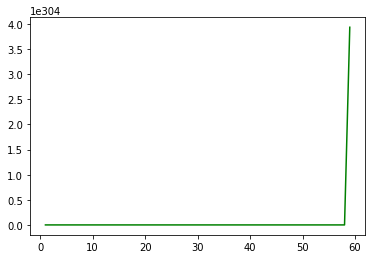




Beginning operation with gazp and mvid


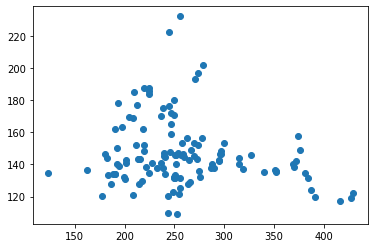


Obtained first result

 First version of gradient downing


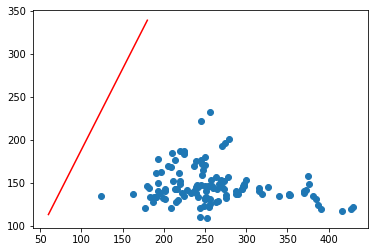

error after gradient descent: 64765.483942849576


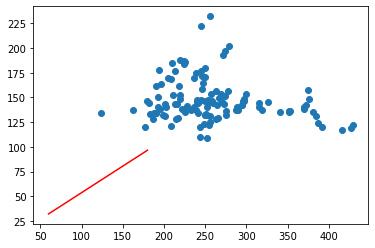

error after gradient descent: 882.5965134295321


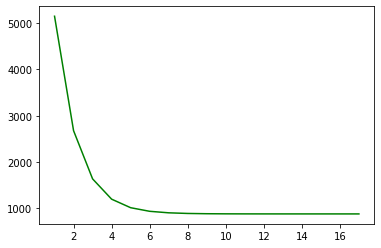




Beginning operation with gazp and sber


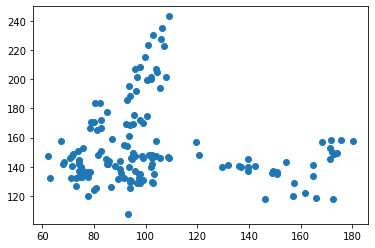


Obtained first result

 First version of gradient downing


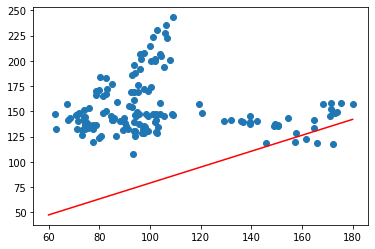

error after gradient descent: 3229.605504518528


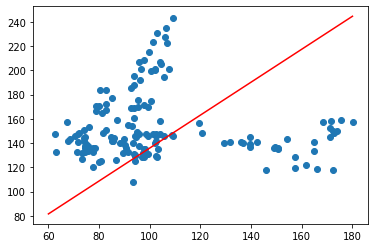

error after gradient descent: 1325.9296063433812


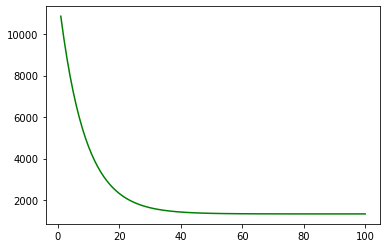




Beginning operation with gazp and usdrub


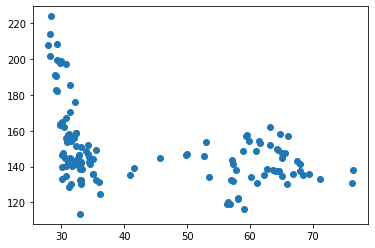


Obtained first result

 First version of gradient downing


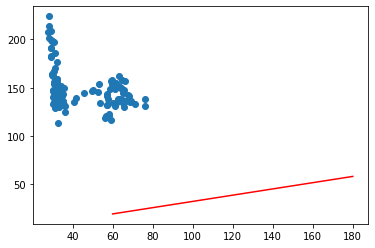

error after gradient descent: 9402.047628950384


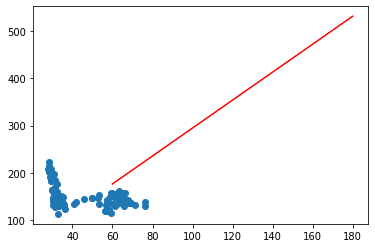

error after gradient descent: 1784.6450481120264


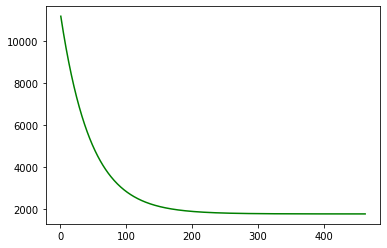




Beginning operation with gazp and yndx


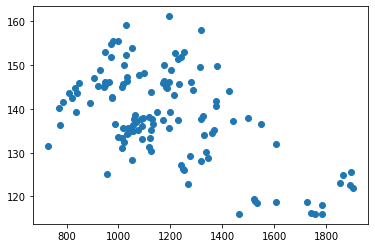


Obtained first result

 First version of gradient downing


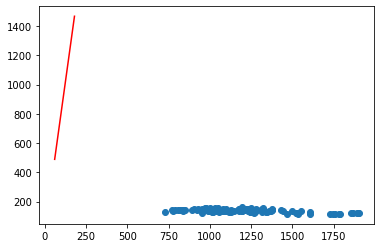

error after gradient descent: 47872869.14697689


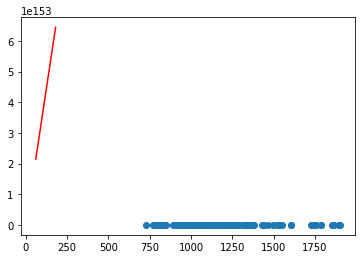

error after gradient descent: inf


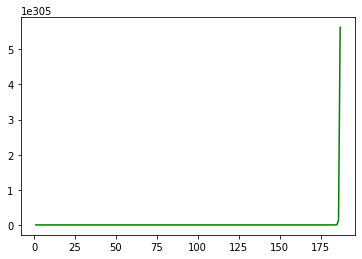




Beginning operation with mgnt and mvid


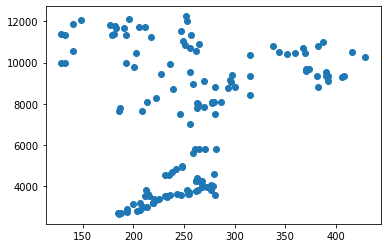


Obtained first result

 First version of gradient downing


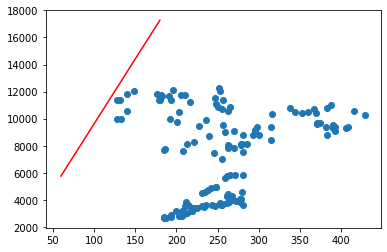

error after gradient descent: 172720911.23973146


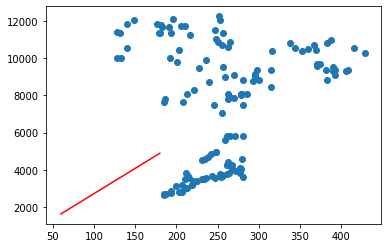

error after gradient descent: 5735507.339729539


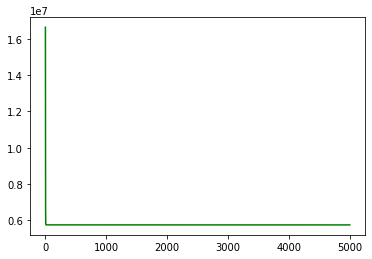




Beginning operation with mgnt and sber


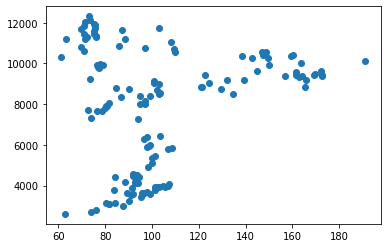


Obtained first result

 First version of gradient downing


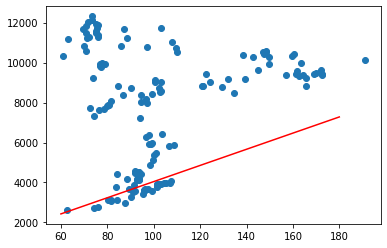

error after gradient descent: 10589376.532493996


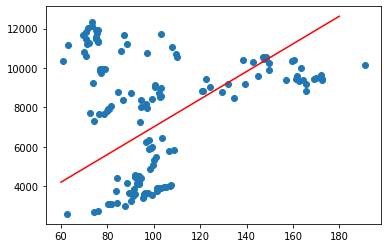

error after gradient descent: 5494373.454295845


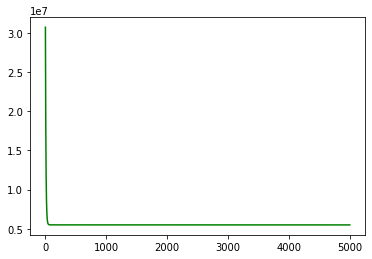




Beginning operation with mgnt and usdrub


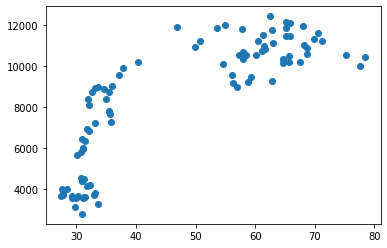


Obtained first result

 First version of gradient downing


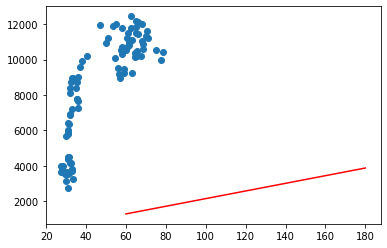

error after gradient descent: 30406797.33846021


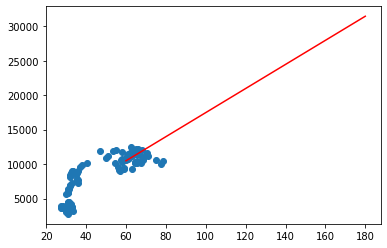

error after gradient descent: 1456808.5825818013


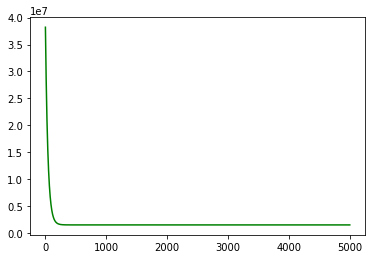




Beginning operation with mgnt and yndx


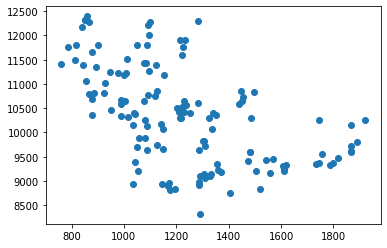


Obtained first result

 First version of gradient downing


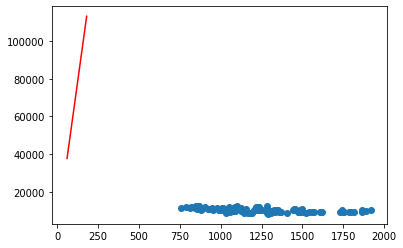

error after gradient descent: 307340458888.2197


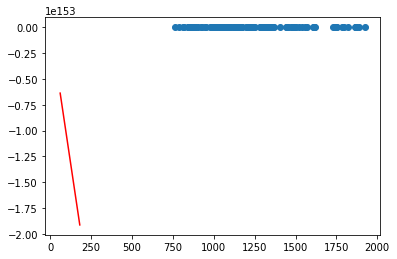

error after gradient descent: inf


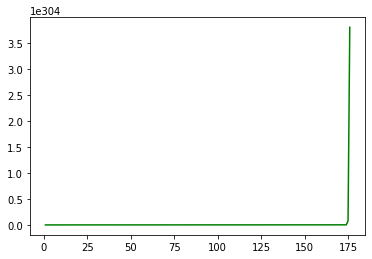




Beginning operation with mvid and sber


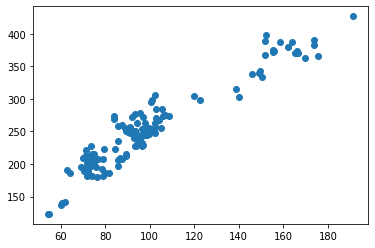


Obtained first result

 First version of gradient downing


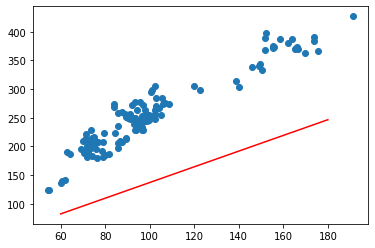

error after gradient descent: 7256.785963096839


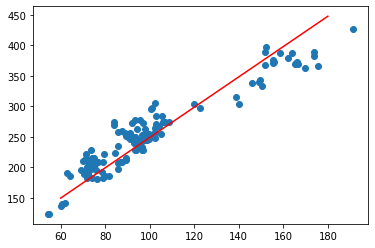

error after gradient descent: 326.70137826106924


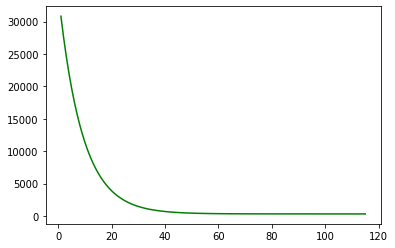




Beginning operation with mvid and usdrub


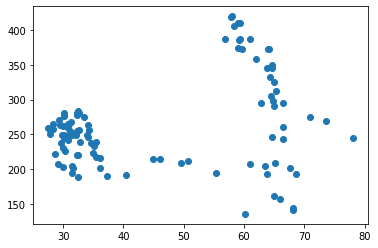


Obtained first result

 First version of gradient downing


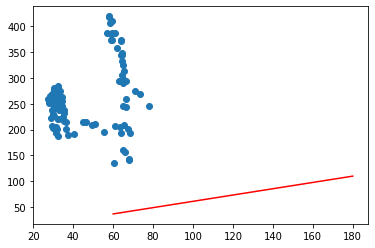

error after gradient descent: 29567.515511961465


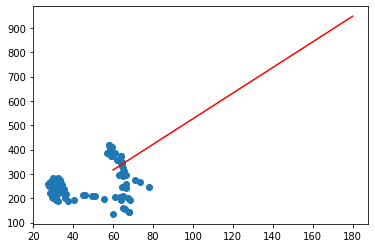

error after gradient descent: 4328.398985085063


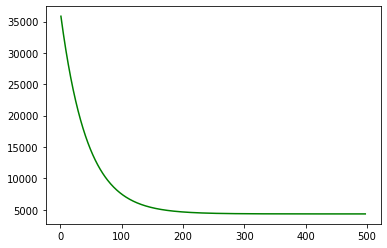




Beginning operation with mvid and yndx


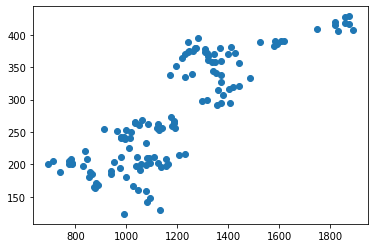


Obtained first result

 First version of gradient downing


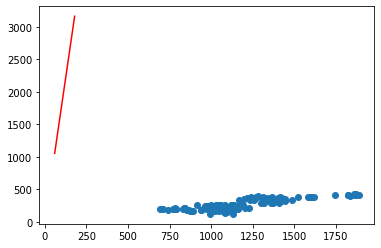

error after gradient descent: 225346804.10731676


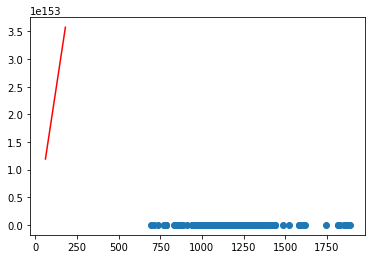

error after gradient descent: inf


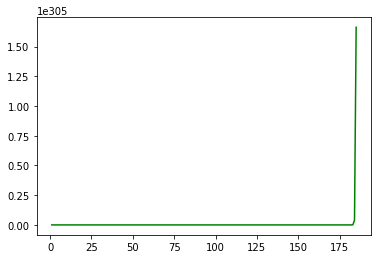




Beginning operation with sber and usdrub


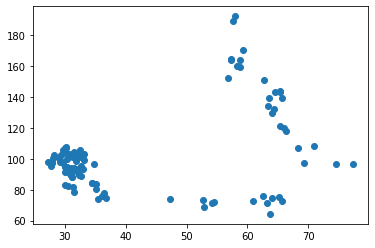


Obtained first result

 First version of gradient downing


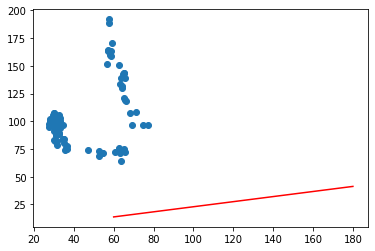

error after gradient descent: 4671.415691284553


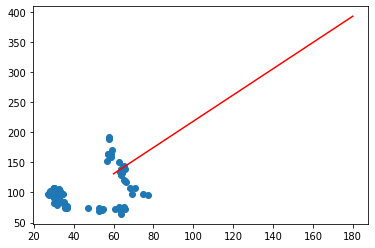

error after gradient descent: 614.1710930799067


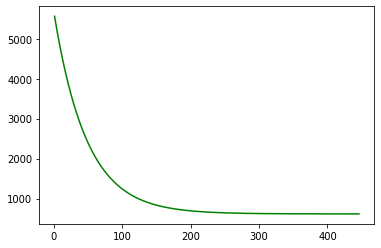




Beginning operation with sber and yndx


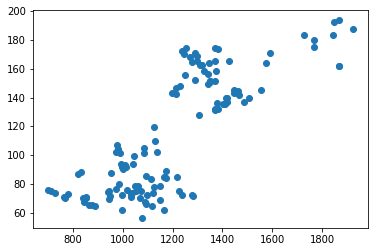


Obtained first result

 First version of gradient downing


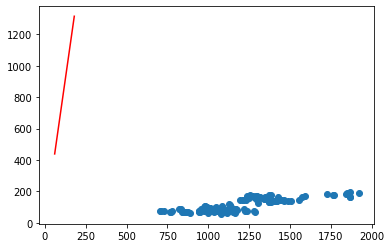

error after gradient descent: 39321610.862647176


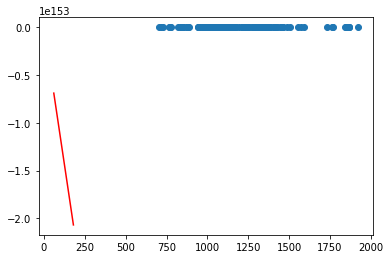

error after gradient descent: inf


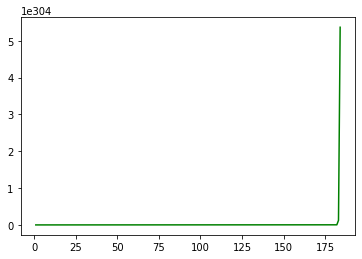




Beginning operation with usdrub and yndx


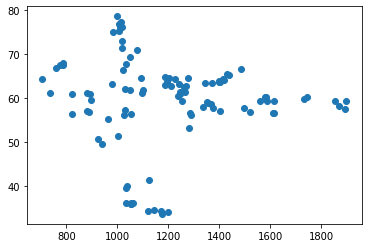


Obtained first result

 First version of gradient downing


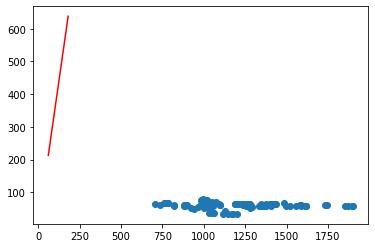

error after gradient descent: 9272044.31489287


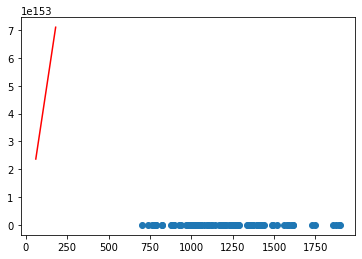

error after gradient descent: inf


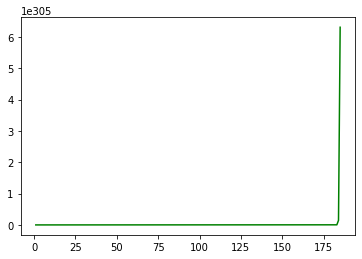

In [ ]:
#Случайная выборка

instruments = ["d_hnd", "gazp", "mgnt", "mvid","sber","usdrub", "yndx"]

for i in range(len(names)):
  for j in range(i,len(names)):
    if(i!=j):
      print(f"\n\n\nBeginning operation with {instruments[i]} and {instruments[j]}")
      x=names[j].sample(n=500)
      y=names[i].sample(n=500)
      res = pd.merge(x, y, on='<DATE>')
      x = res['<CLOSE>_x']
      y = res['<CLOSE>_y']
      plt.figure()
      plt.scatter(x, y)
      plt.show()
      print("\nObtained first result")

      hyp = Regress()
      print("\n First version of gradient downing")
      hyp.BDG_ver1(x, y)
      J = hyp.error(x, y)
      print("error after gradient descent:", J)

      hyp = Regress()
      steps, errors = hyp.BDG_ver2(x, y)
      J = hyp.error(x, y)
      print("error after gradient descent:", J)
      hyp.error_of_mistake(steps, errors)


In [ ]:
#Парная регрессия
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = d_hnd.head(1000)
y = gazp.head(1000)

X_train, X_test, y_train, y_test = train_test_split(X[['<DATE>','<TIME>','<CLOSE>','<VOL>']], y[['<DATE>','<TIME>','<CLOSE>','<VOL>']], test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test,y_test), "Score")

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
#print(y_pred, "prediction")
print("\nThe first five prediction {}".format(y_pred[:5]))
print("\nThe real first five labels {}".format(y_pred[:5]))

# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# df

0.5979275890981516 Score
[3.00181841e+06 0.00000000e+00 6.48107961e+04 3.66149296e+10]
[[ 8.48906826e-01  0.00000000e+00  3.19449896e+00 -2.85417992e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.21822137e-03  8.67361738e-19  7.45288451e-03 -1.36766083e-04]
 [-1.82290729e+03  1.81898940e-12  8.66081903e+03  1.65616378e+04]]

The first five prediction [[2.01393153e+07 0.00000000e+00 1.37099825e+02 4.85146550e+07]
 [2.01396434e+07 0.00000000e+00 1.40365828e+02 5.13879654e+07]
 [2.01119103e+07 0.00000000e+00 1.76597344e+02 5.62749201e+07]
 [2.01233975e+07 0.00000000e+00 1.53426949e+02 4.77745041e+07]
 [2.01229862e+07 0.00000000e+00 1.50403402e+02 4.50219265e+07]]

The real first five labels [[2.01393153e+07 0.00000000e+00 1.37099825e+02 4.85146550e+07]
 [2.01396434e+07 0.00000000e+00 1.40365828e+02 5.13879654e+07]
 [2.01119103e+07 0.00000000e+00 1.76597344e+02 5.62749201e+07]
 [2.01233975e+07 0.00000000e+00 1.53426949e+02 4.77745041e+07]
 [2.01229862e+07 0.00

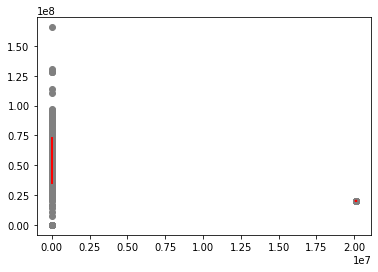

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4853741.6265480295
Mean Squared Error: 155892559006962.53
Root Mean Squared Error: 12485694.174012214


In [ ]:
#Check that everythink works fine during the visual side
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

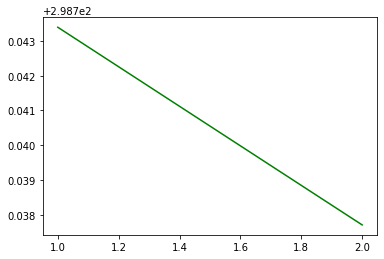

In [ ]:
#Ошибка регрессии со временем
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()